In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

\begin{equation}
    null\_score \sim U(0, 1)
\end{equation}

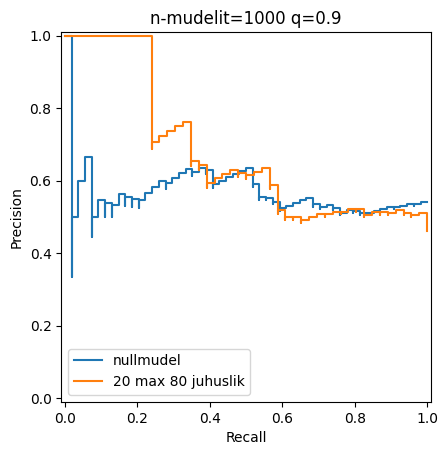

In [2]:
n_samples = 100
n_models = 1000
quantile = 0.9

_, ax = plt.subplots()
ax.set_title(f"n-mudelit={n_models} q={quantile}")

# juhuslik
y = np.random.binomial(n=1, p=0.5, size=n_samples)
null_scores = [np.random.uniform(size=n_samples) for _ in range(n_models)]
null_score_q = np.quantile(null_scores, quantile, axis=0)

precision, recall, _ = precision_recall_curve(y, y_score=null_score_q)
display = PrecisionRecallDisplay(precision, recall)
display.plot(ax=ax, name=f"nullmudel")

# 20/80 max/juhuslik
tenth = int(n_samples / 10)
shuffle = np.random.permutation(n_samples)

y = np.concat((np.zeros(tenth), np.ones(tenth), np.random.binomial(n=1, p=0.5, size=tenth * 8)))[shuffle]

rigged_scores = [np.concat((np.zeros(tenth), np.ones(tenth), np.random.uniform(size=tenth * 8)))[shuffle]
                 for _ 
                 in range(n_models)]
rigged_score_q = np.quantile(rigged_scores, quantile, axis=0)

precision, recall, _ = precision_recall_curve(y, y_score=rigged_score_q)
display = PrecisionRecallDisplay(precision, recall)
display.plot(ax=ax, name=f"20 max 80 juhuslik")

# 20/80 õige/juhuslik
# TODO: ...